# A experiment using Taxes on Goods and Services
This notebook makes one of the "standard experiment" used to check MfMod models on the PAK model {cite:author}`Burns2021` . 

The variable PAKGGREVGNFSCN (Taxes on Goods and Services) is increased by 1 percent of gdp (PAKNYGDPMKTPCN) in 2023 and the impulse response is visualized.<br>
Process:
1. Loading a pre-existing model in Modelflow
2. Creating the experimet by updating PAKGGREVGNFSCN 
3. Simulating the model
4. Visualizing the results 


:::{note}
PAKGGREVGNFSCN is the only variable of the standard shock variables: ```GGEXPCRNTCN GGEXPWAGECN GGREVGNFSCN GGREVDPITCN GGREVDCITCN``` which is relevant for this particular model 
:::

## Imports

Modelflow's modelclass includes most of the methods needed to manage a model in Modelflow.

In [1]:
from modelclass import model 
model.widescreen()
model.scroll_off()

In [2]:
%load_ext autoreload
%autoreload 2

## Load a pre-existing model, data and descriptions 
The file `pak.pcim` contains a dump of model equations, dataframe, simulation options and variable descriptions. The file has been created when onboarding the model. 
Examples can be found [here](../onboard/eviews/onboard%20one%20model%20from%20%20wf1.ipynb)

In [3]:
mpak,baseline = model.modelload('../onboard/eviews/modelflowdumps/pak.pcim',alfa=0.7,run=1,keep= 'Baseline')

file read:  ../onboard/eviews/modelflowdumps/pak.pcim


## Fix the equation for PAKGGREVGNFSCN
The equation looks like this:

In [4]:
mpak.PAKGGREVGNFSCN.frml

Endogeneous: PAKGGREVGNFSCN: Taxes on Goods and Services
Formular: FRML <Z,EXO> PAKGGREVGNFSCN = ((PAKGGREVGNFSXN/100*(PAKNECONPRVTCN+PAKNECONGOVTCN))+5.34672642860449E-12 + PAKGGREVGNFSCN_A)* (1-PAKGGREVGNFSCN_D)+ PAKGGREVGNFSCN_X*PAKGGREVGNFSCN_D  $

PAKGGREVGNFSCN  : Taxes on Goods and Services
PAKGGREVGNFSCN_A: Add factor:Taxes on Goods and Services
PAKGGREVGNFSCN_D: Fix dummy:Taxes on Goods and Services
PAKGGREVGNFSCN_X: Fix value:Taxes on Goods and Services
PAKGGREVGNFSXN  : Goods and services Tax Rate
PAKNECONGOVTCN  : Govt. Cons., LCU mn
PAKNECONPRVTCN  : Pvt. Cons., LCU mn




The result of the equation can be fixes by calling mpak.fix(\<dataframe>,PAKGGREVGNFSCN,2023,2023)

This will create a new dataframe where the value of PAKGGREVGNFSCN_X is set to the current value of PAKGGREVGNFSCN, and the value of PAKGGREVGNFSCN_D is set to 1 in the year 2023.<br>
When this dataframe is simulated the value of PAKGGREVGNFSCN will not depend on the ordinary right hand side variables, only on the value of PAKGGREVGNFSCN_X. 

In [5]:
alternative_base = mpak.fix(baseline,'PAKGGREVGNFSCN',2023,2023)

:::{warning}
In this experiment PAKGGREVGNFSCN is fixed in 2023. The value in all other years will be calculated using the original equation. <br>
To fix the value for all periods replace ```2023,2023``` with ```2023,2100```
:::

## Create a scenario by shocking PAKGGREVGNFSCN 
A new dataframe where PAKGGREVGNFSCN_X is increased by one percent of GDP is created

In [6]:
alternative = alternative_base.upd(f'<2023 2023> PAKGGREVGNFSCN_X + {baseline.loc[2023,"PAKNYGDPMKTPCN"]*0.01 }')

The variable before and after the shock can be 
displayed

In [7]:
print(f'Value of GDP in 2023: {baseline.loc[2023,"PAKNYGDPMKTPCN"]:,.0f}')
print(f'Base value in 2023: {alternative_base.loc[2023,"PAKGGREVGNFSCN_X"]:,.0f}. Alternative value: {alternative.loc[2023,"PAKGGREVGNFSCN_X"]:,.0f}.'
    f'Difference: {-(alternative_base.loc[2023,"PAKGGREVGNFSCN_X"]-alternative.loc[2023,"PAKGGREVGNFSCN_X"]):,.0f}.')

Value of GDP in 2023: 67,604,654
Base value in 2023: 2,804,747. Alternative value: 3,480,793.Difference: 676,047.


## Simulate the model

In [8]:
%matplotlib notebook 
result = mpak(alternative,2020,2035,keep='Taxes on Goods and Services up by 1 pct of GDP in 2023') # simulates the model 

## Access results 

Now we have two dataframes with results ```baseline``` and ```result```. These dataframes can be manipulated and visualized
with the tools provided by the **pandas** library and other like **Matplotlib** and **Plotly**. However to make things easy the first and
latest simulation result is also in the mpak object:

- **mpak.basedf**: Dataframe with the values for baseline
- **mpak.lastdf**: Dataframe with the values for alternative  

The result can easily be visualized in Jupyter notebooks by using the ```[.]``` operator this will display the values of the variables in square brackets and useful 
transformations of the values including the impact. In addition the exotenous variables which has changed are displayed.  

**Click on the tabs to display the different output**


In [9]:
mpak['PAKNYGDPMKTPCN PAKNYGDPMKTPKN PAKGGEXPTOTLCN PAKGGREVTOTLCN PAKNECONGOVTKN']

## Or use keep_plot to make more bespoken charts which can be saved  in many formats

This method can display a number of different transformations of the series for more [here](./create_save_scenarios.ipynb#.keep_plot()--Function-to-visualize-the-keept-solutions)<br>
Here only a few: 



### Differences of growth rates 

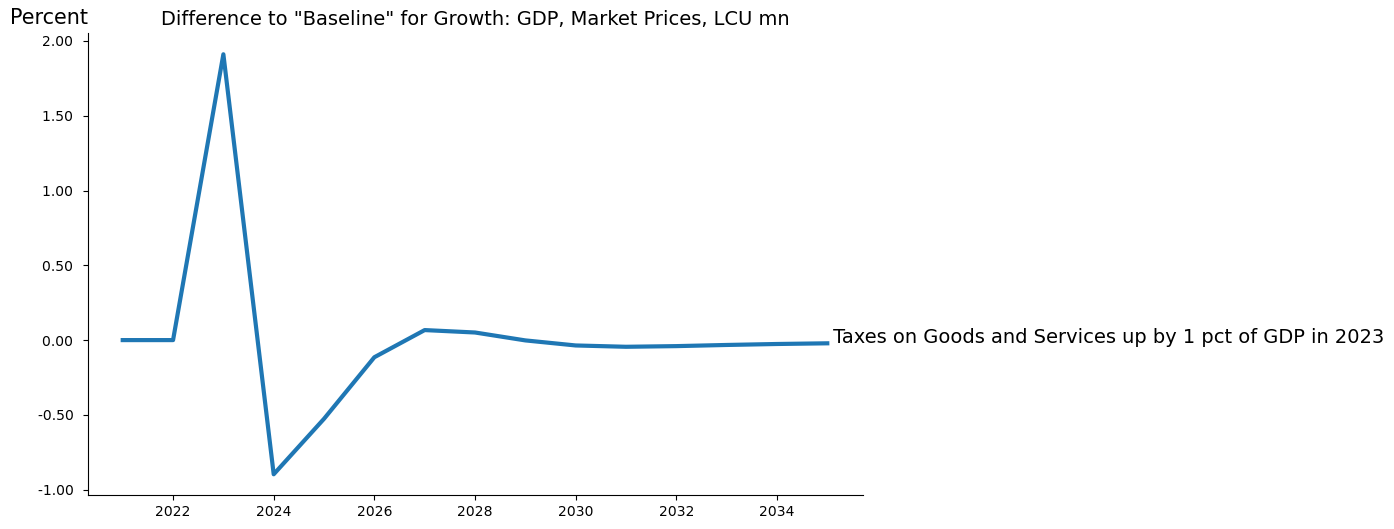

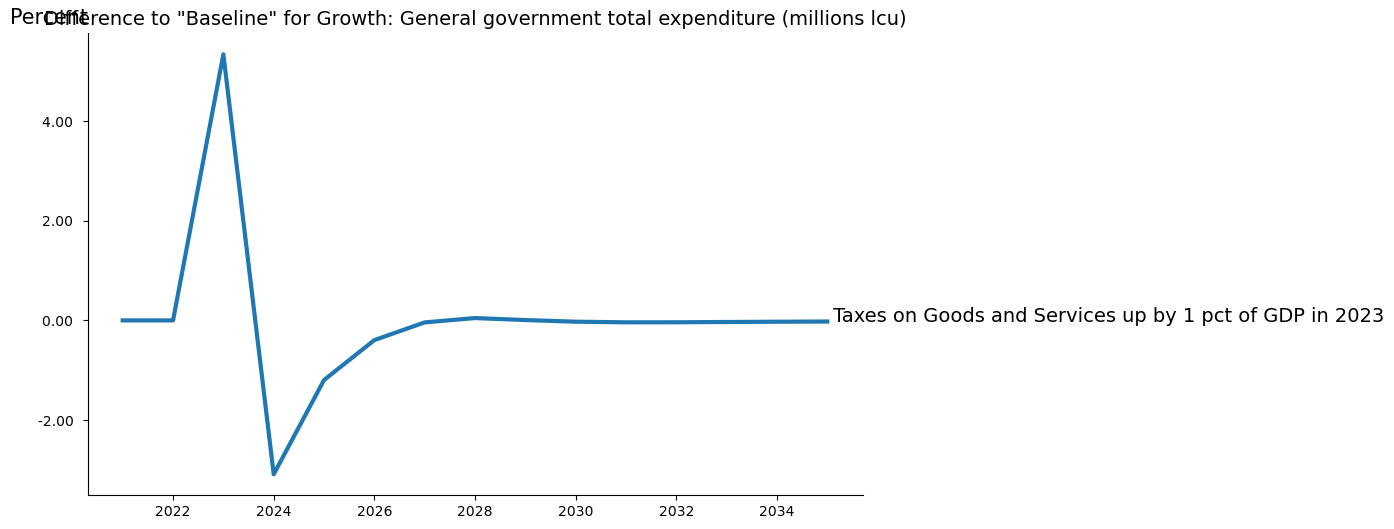

In [10]:
mpak.keep_plot('PAKNYGDPMKTPCN PAKGGEXPTOTLCN',diff=1,showtype='growth',savefig='testgraph/tax_impact_growth_.svg',legend=0);

### Differences in percent of baseline values

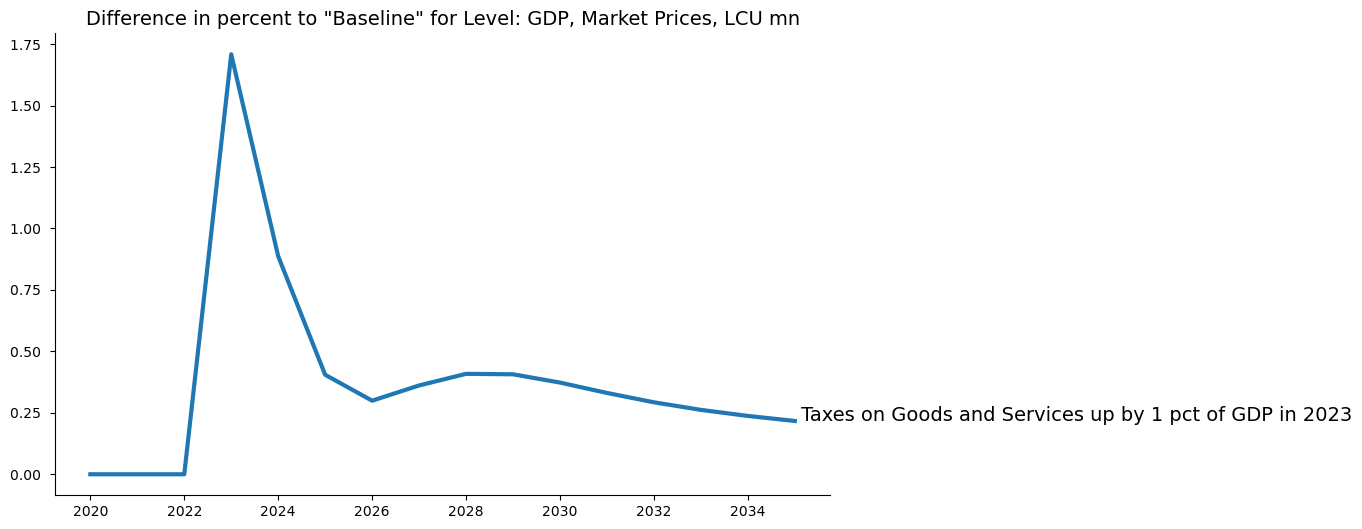

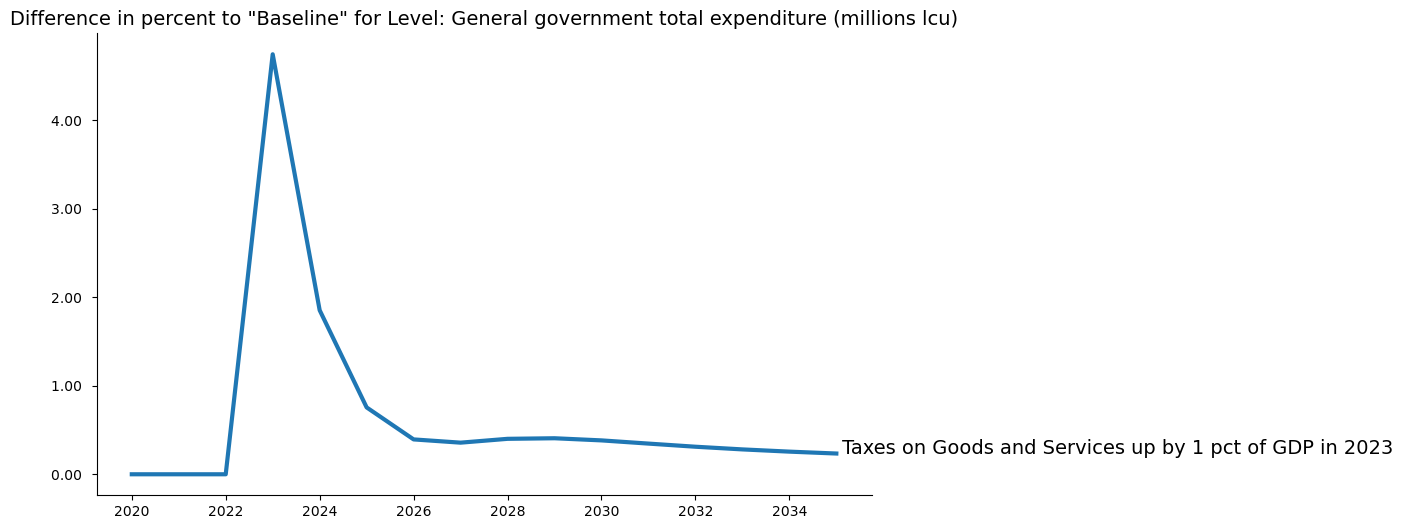

In [11]:
mpak.keep_plot('PAKNYGDPMKTPCN PAKGGEXPTOTLCN',diffpct=1,showtype='level',savefig='testgraph/tax_impact_difpct_.svg',legend=0);

## Some variations on keep_plot(

The **variables** we want to be displayed is listed as first argument. Variable names can include 
wildcards (using * for any string and ? for any character) 

**Transformation of data displayed:** 

| showtype= |Use this operator|
| :- | :---|
 'level' (default)|No transformation  
 'growth'| The growth rate  in percent 
 'change'| The yearly change ($\Delta$) 

**legend placement**

| legend= |Use this operator|
| :- | :---|
 False (default) |The legends will be placed at the end of the corresponding line
 True|The legends are places in a legend box


Often it is useful to compare the scenario results with the baseline result. This is done with the diff argument. 

| diff= |Use this operator|
| :- | :---|
 False (default) |All entries in the keep_solution dictionary is displayed
 True|The difference to the first entry is shown.

It can also be useful to compare the scenario results with the baseline result **measured in percent**. This is done with the diffpct argument. 

| diffpct= |Use this operator|
| :- | :---|
 False (default) |All entries in the keep_solution dictionary is displayed
 True|The difference in percent to the first entry is shown
 
 
 ```savefig='[path/]<prefix>.<extension>'```
 Will create a number of files with the charts.<br>
 The files will be saved location with name ```<path>/<prefix><variable name>.<extension>``` <br>The extension determines the 
 format of the saved file. pdf, svg and png are the most common extensions. 

In [12]:
!dir testgraph\

 Volume in drive C has no label.
 Volume Serial Number is C2DB-095E

 Directory of c:\modelflow manual\working_paper\thebook\content\howto\experiments\testgraph

10-01-2023  14:59    <DIR>          .
10-01-2023  14:59    <DIR>          ..
10-01-2023  16:07            35.849 tax_impact_difpct__PAKGGEXPTOTLCN.svg
10-01-2023  16:07            37.126 tax_impact_difpct__PAKNYGDPMKTPCN.svg
10-01-2023  16:07            35.274 tax_impact_growth__PAKGGEXPTOTLCN.svg
10-01-2023  16:07            36.558 tax_impact_growth__PAKNYGDPMKTPCN.svg
               4 File(s)        144.807 bytes
               2 Dir(s)  731.824.709.632 bytes free


In [13]:
# fixed_alternative = mpak.fix(alternative,'PAKGGEXPCAPTCN PAKGGEXPGNFSCN PAKGGEXPOTHRCN PAKGGEXPTRNSCN',2023,2035)
fixed_alternative = mpak.fix(alternative,'PAKGGEXPCAPTCN ',2023,2035)


In [14]:
result_fixed_expenditure = mpak(fixed_alternative,2020,2035,keep='Taxes on Goods and Services up, expenditure fixed',silent=0,first_test=60) # simulates the model 

Will start solving: PAK
Create compiled solving function for PAK
ljit=False stringjit=True  transpile_reset=False  hasattr(self, f"pro_{jitname}")=False


2020 Solved in 61 iterations
2021 Solved in 61 iterations
2022 Solved in 61 iterations
2023 Solved in 70 iterations
2024 Solved in 62 iterations
2025 Solved in 62 iterations
2026 Solved in 62 iterations
2027 Solved in 62 iterations
2028 Solved in 62 iterations
2029 Solved in 62 iterations
2030 Solved in 62 iterations
2031 Solved in 62 iterations
2032 Solved in 62 iterations
2033 Solved in 62 iterations
2034 Solved in 62 iterations
2035 Solved in 62 iterations
PAK solved  


Running calc_adjust_model 
Dummies set ['PAKGGEXPCAPTCN_D', 'PAKGGREVGNFSCN_D']
Will start calculating: Calculate add factors
2020  solved
2021  solved
2022  solved
2023  solved
2024  solved
2025  solved
2026  solved
2027  solved
2028  solved
2029  solved
2030  solved
2031  solved
2032  solved
2033  solved
2034  solved
2035  solved
Calculate add factors calculated 


In [15]:
mpak.fix_dummy_fixed

['PAKGGEXPCAPTCN_D', 'PAKGGREVGNFSCN_D']

In [16]:
mpak['PAKNYGDPMKTPCN PAKNYGDPMKTPKN PAKGGEXPTOTLCN PAKGGREVTOTLCN PAKNECONGOVTKN']

In [17]:
mpak.keep_solutions.keys()

dict_keys(['Baseline', 'Taxes on Goods and Services up by 1 pct of GDP in 2023', 'Taxes on Goods and Services up, expenditure fixed'])

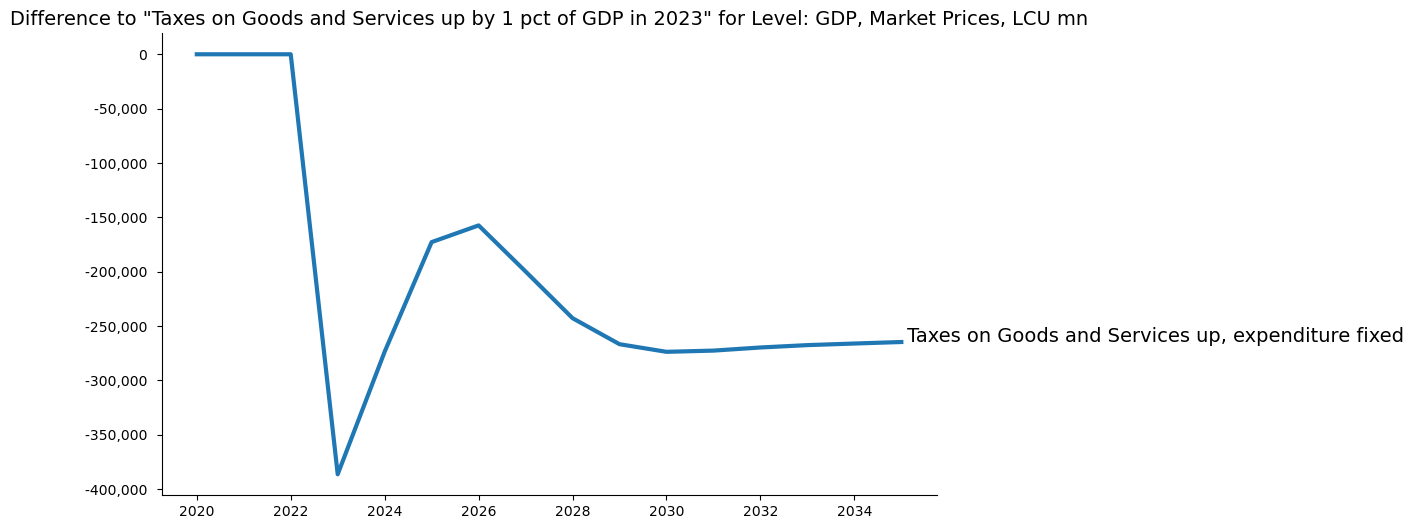

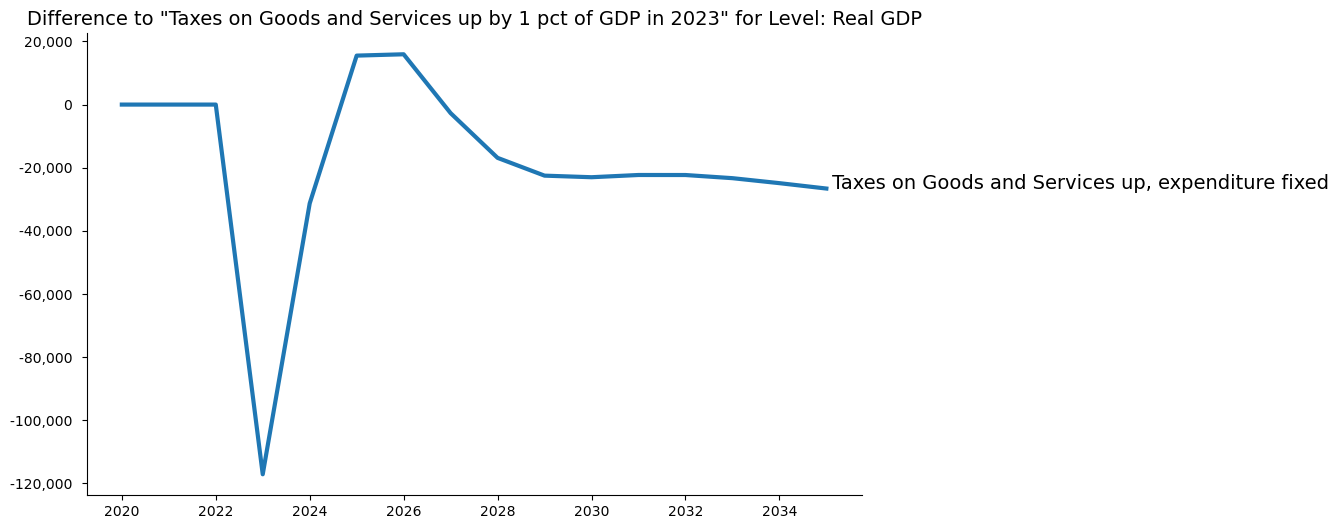

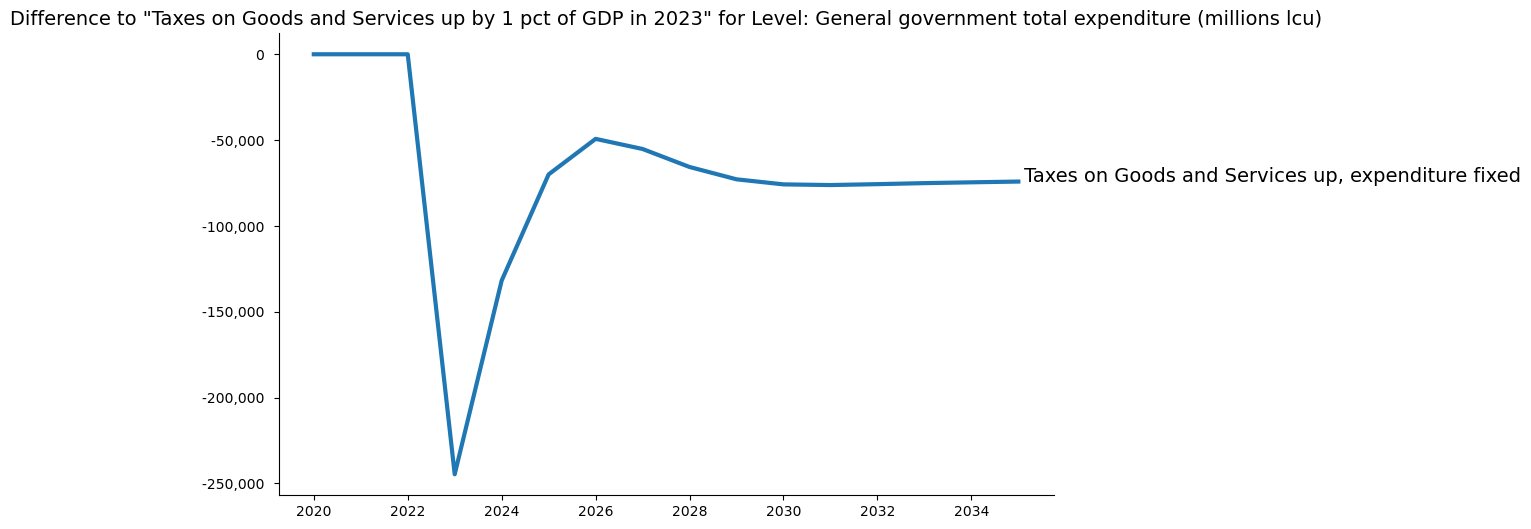

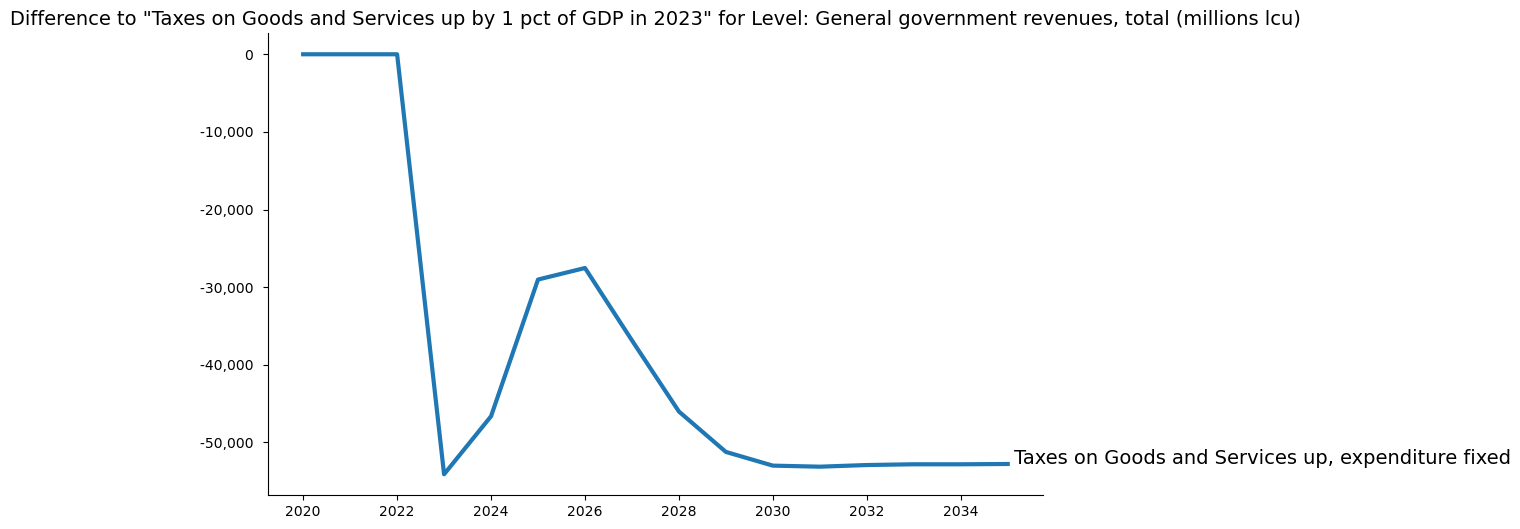

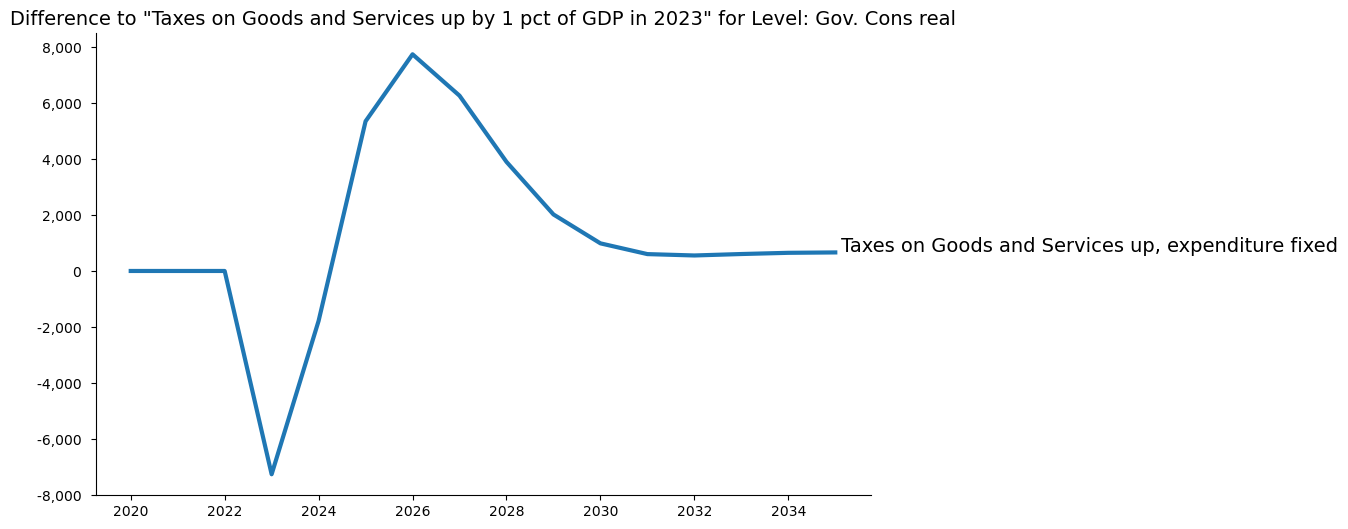

In [18]:
with mpak.keepswitch(scenarios='Taxes on Goods and Services up by 1 pct of GDP in 2023|Taxes on Goods and Services up, expenditure fixed'):
    mpak.keep_plot('PAKNYGDPMKTPCN PAKNYGDPMKTPKN PAKGGEXPTOTLCN PAKGGREVTOTLCN PAKNECONGOVTKN',diff=1,showtype='level',legend=0);